In [2]:


import pandas as pd
import matplotlib.pyplot as plt
import tikzplotlib

df_issue_all = pd.read_csv('data/templates_repo.csv')
df_issue = pd.read_csv('data/individual_issue_contents.csv')
df_pr = pd.read_csv('data/individual_pr_contents.csv')

# Plot the top 10 issue templates
plt.style.use('ggplot')
# change font style 
plt.rcParams['font.family'] = 'sans-serif'

In [3]:
issue_files = df_issue['issue_file'].tolist()
pr_files = df_pr['pr_file'].tolist()

print('Number of issue templates: ', len(issue_files))
print('Number of PR templates: ', len(pr_files))

# get count of each template
issue_files_count = {}
for files in issue_files:
    for file in files.split(','):
        if file in issue_files_count:
            issue_files_count[file] += 1
        else:
            issue_files_count[file] = 1

pr_files_count = {}
for files in pr_files:
    for file in files.split(','):
        if file in pr_files_count:
            pr_files_count[file] += 1
        else:
            pr_files_count[file] = 1

# sort the templates by count and print the top 1 
sorted_issue_files_count = sorted(issue_files_count.items(), key=lambda x: x[1], reverse=True)
sorted_pr_files_count = sorted(pr_files_count.items(), key=lambda x: x[1], reverse=True)

print('Top 1 issue template: ', sorted_issue_files_count[0])
print('Top 1 PR template: ', sorted_pr_files_count[0])

# get the list of repos
repos = df_issue['repo'].tolist()
repos = list(set(repos))

Number of issue templates:  6574
Number of PR templates:  2601
Top 1 issue template:  ('bug_report.md', 1107)
Top 1 PR template:  ('PULL_REQUEST_TEMPLATE.md', 1615)


## Research Question 1: 

#### What are the common types of GitHub issue and pull request templates used in the OSS Projects?

---

### Top 5 most common issue templates

Max number of PRs for a single template:  1458
Number of PRs with the most popular template:  1458
PR Template Name bug_report
Total number of PRs:  6574
Max number of PRs for a single template:  2349
Number of PRs with the most popular template:  2349
PR Template Name pull_request_template
Total number of PRs:  2601


/var/folders/hj/hqb_52jn35x_09z5ptx014d40000gn/T/ipykernel_72039/2097639535.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  unique_issue_templates = df_issue['issue_file'].str.lower().str.replace('.md', '')
/var/folders/hj/hqb_52jn35x_09z5ptx014d40000gn/T/ipykernel_72039/2097639535.py:23: FutureWarning: The default value of regex will change from True to False in a future version.
  unique_pr_templates = df_pr['pr_file'].str.lower().str.replace('.md', '')
/var/folders/hj/hqb_52jn35x_09z5ptx014d40000gn/T/ipykernel_72039/2097639535.py:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(top_10_pr_templates['template'], rotation=75)


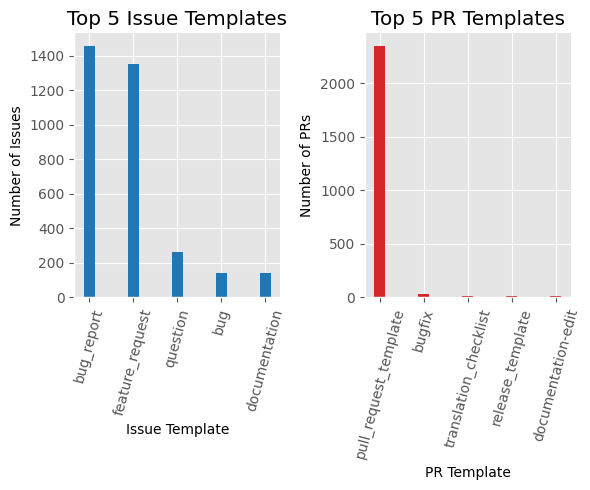

In [62]:
unique_issue_templates = df_issue['issue_file'].str.lower().str.replace('.md', '')
# if any name contain 'bug' consider it as a bug template
unique_issue_templates = unique_issue_templates.str.replace('bug_report', 'bug_report')
unique_issue_templates = unique_issue_templates.str.replace('bug-report', 'bug_report')
unique_issue_templates = unique_issue_templates.str.replace('bug_report', 'bug_report')
unique_issue_templates = unique_issue_templates.str.replace('feature_request', 'feature_request')
unique_issue_templates = unique_issue_templates.str.replace('feature-request', 'feature_request')

# Count the occurrences of each unique issue template
issue_template_counts = unique_issue_templates.value_counts()

# Create a dataframe with the counts of each template
df_issue_template_counts = pd.DataFrame({'template': issue_template_counts.index, 'count': issue_template_counts.values})

print('Max number of PRs for a single template: ', issue_template_counts.max())
print('Number of PRs with the most popular template: ', issue_template_counts[0])
print('PR Template Name', issue_template_counts.index[0])
print('Total number of PRs: ', issue_template_counts.sum())

top_10_issue_templates = df_issue_template_counts.head(5)


unique_pr_templates = df_pr['pr_file'].str.lower().str.replace('.md', '')

# Count the occurrences of each unique pr template
pr_template_counts = unique_pr_templates.value_counts()

# Create a dataframe with the counts of each template
df_pr_template_counts = pd.DataFrame({'template': pr_template_counts.index, 'count': pr_template_counts.values})

# print the max number of prs for a single template and count 
print('Max number of PRs for a single template: ', pr_template_counts.max())
print('Number of PRs with the most popular template: ', pr_template_counts[0])
print('PR Template Name', pr_template_counts.index[0])
print('Total number of PRs: ', pr_template_counts.sum())

top_10_pr_templates = df_pr_template_counts.head(5)


fig, ax = plt.subplots(1, 2, figsize=(6, 5))
ax[0].bar(top_10_issue_templates['template'], top_10_issue_templates['count'], color='tab:blue', width=0.25)
#reduce the gap between the bars
ax[0].set_xticks(top_10_issue_templates['template'])
ax[0].set_xticklabels(top_10_issue_templates['template'], rotation=75)
ax[0].set_ylabel('Number of Issues')
ax[0].set_xlabel('Issue Template')
ax[0].set_title('Top 5 Issue Templates')

ax[1].bar(top_10_pr_templates['template'], top_10_pr_templates['count'], color='tab:red', width=0.25)
ax[1].set_xticklabels(top_10_pr_templates['template'], rotation=75)
ax[1].set_ylabel('Number of PRs')
ax[1].set_xlabel('PR Template')
ax[1].set_title('Top 5 PR Templates')

# put xlabels in the bottom of the fig on the same height
ax[0].xaxis.set_label_position('bottom')
ax[0].xaxis.tick_bottom()
ax[1].xaxis.set_label_position('bottom')
ax[1].xaxis.tick_bottom()



ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

### Common issue and pull request templates 

In [6]:
df_issue_template_counts = df_issue_template_counts.sort_values(by=['count'], ascending=False)
df_pr_template_counts = df_pr_template_counts.sort_values(by=['count'], ascending=False)

top_common_issue_templates = df_issue_template_counts.head(3).set_index('template')['count'].to_dict()
top_common_pr_templates = df_pr_template_counts.head(3).set_index('template')['count'].to_dict()

# print the top 3 common issue templates, with the percentage they represent
print('Top 3 common issue templates:')
for template, count in top_common_issue_templates.items():
    print(template, count)
    print('Percentage: {:.2f}%'.format(count / df_issue.shape[0] * 100))

# print the top 3 common pr templates
print('\nTop 3 common pr templates:')
for template, count in top_common_pr_templates.items():
    print(template, count)
    print('Percentage: {:.2f}%'.format(count / df_pr.shape[0] * 100))
    


Top 3 common issue templates:
bug_report 1458
Percentage: 22.18%
feature_request 1355
Percentage: 20.61%
question 264
Percentage: 4.02%

Top 3 common pr templates:
pull_request_template 2349
Percentage: 90.31%
bugfix 29
Percentage: 1.11%
translation_checklist 15
Percentage: 0.58%


In [38]:
# get the content of the bug report templates (random 10)
bug_report_template_contents = df_issue[df_issue['issue_file'].str.contains('bug_report')]['body'].tolist()

# get the sections headings of the bug report templates
bug_report_template_sections = []
for template in bug_report_template_contents:
    sections = []
    for line in template.split('\n'):
        if line.startswith('#'):
            # remove the '#' from the section heading
            line = line.replace('#', '')
            line = line.strip()
            sections.append(line)
            
    bug_report_template_sections.append('\n'.join(sections))
    
    
# get the average number of sections in the bug report templates
print('Average number of sections in the bug report templates: {:.2f}'.format(sum([len(x.split('\n')) for x in bug_report_template_sections]) / len(bug_report_template_sections)))

from collections import Counter
bug_report_template_sections = [x.split('\n') for x in bug_report_template_sections]
bug_report_template_sections = [item for sublist in bug_report_template_sections for item in sublist]
bug_report_template_sections = [x.strip() for x in bug_report_template_sections]
bug_report_template_sections = [x for x in bug_report_template_sections if x != '']

bug_report_template_sections = Counter(bug_report_template_sections)
print('Most common sections in the bug report templates:')
for section, count in bug_report_template_sections.most_common(50):
    print(section)
    print('Percentage: {:.2f}%'.format(count / len(bug_report_template_sections) * 100))
    print('------------------------')
    
# get the percentage of section in common template 'bug_report.md'
for section in bug_report_template_sections.most_common(50):
    print(section[0], section[1] / len(bug_report_template_sections) * 100)


Average number of sections in the bug report templates: 3.74
Most common sections in the bug report templates:
Expected behavior
Percentage: 71.97%
------------------------
Steps to reproduce
Percentage: 59.83%
------------------------
Environment
Percentage: 55.23%
------------------------
Actual behavior
Percentage: 48.54%
------------------------
What did you do?
Percentage: 46.86%
------------------------
What did you expect to see?
Percentage: 46.44%
------------------------
What did you see instead?
Percentage: 46.44%
------------------------
Description
Percentage: 44.35%
------------------------
Additional context
Percentage: 42.68%
------------------------
What version of gRPC and what language are you using?
Percentage: 41.00%
------------------------
What operating system (Linux, Windows,...) and version?
Percentage: 41.00%
------------------------
What runtime / compiler are you using (e.g. python version or version of gcc)
Percentage: 38.08%
------------------------
Anythi

In [34]:

# get the content of the bug report templates (random 10)
feature_request_template_contents = df_pr[df_pr['pr_file'].str.contains('pull_request_template')]['body'].tolist()
# print len of feature request template contents
print('Number of feature request templates: ', len(feature_request_template_contents))

# get the sections headings of the bug report templates
feature_request_template_sections = []
for template in feature_request_template_contents:
    sections = set()
    for line in template.split('\n'):
        if line.startswith('#'):
            # remove the '#' from the section heading
            line = line.replace('#', '')
            line = line.strip()
            # if a section is already in the list, don't add it again
            sections.add(line)
            
    feature_request_template_sections.extend(sections)
    
print('Average number of sections in the feature request templates: {:.2f}'.format(sum([len(x.split('\n')) for x in feature_request_template_sections]) / len(feature_request_template_sections)))

from collections import Counter
feature_request_template_sections = [x.split('\n') for x in feature_request_template_sections]
feature_request_template_sections = [item for sublist in feature_request_template_sections for item in sublist]
feature_request_template_sections = [x.strip() for x in feature_request_template_sections]
feature_request_template_sections = [x for x in feature_request_template_sections if x != '']

feature_request_template_sections = Counter(feature_request_template_sections)

print('Most common sections in the feature request templates:')
for section, count in feature_request_template_sections.most_common(5):
    print(section)
    print('Percentage: {:.2f}%'.format(count / len(feature_request_template_sections) * 100))
    print('------------------------')
    
for section in feature_request_template_sections:
   print(section, feature_request_template_sections[section] / len(feature_request_template_sections))
   # calculate the percentage of section in common template 'pull_request_template.md', and 2 decimal places
   print(section, '{:.2f}'.format(feature_request_template_sections[section] / len(feature_request_template_sections) * 100))
   

Number of feature request templates:  687
Average number of sections in the feature request templates: 1.00
Most common sections in the feature request templates:
Description
Percentage: 145.37%
------------------------
Checklist
Percentage: 141.67%
------------------------
Summary
Percentage: 27.78%
------------------------
Check List
Percentage: 26.85%
------------------------
Checklist:
Percentage: 25.93%
------------------------
Description 1.4537037037037037
Description 145.37
Checklist 1.4166666666666667
Checklist 141.67
Type of changes 0.12962962962962962
Type of changes 12.96
Test plan 0.12962962962962962
Test plan 12.96
Describe the pull request 0.12962962962962962
Describe the pull request 12.96
What does this PR do? 0.12037037037037036
What does this PR do? 12.04
Pull Request 0.12037037037037036
Pull Request 12.04
Related issue 0.12037037037037036
Related issue 12.04
PR checklist 0.12962962962962962
PR checklist 12.96
Pull Request Template 0.1388888888888889
Pull Request Tem

In [36]:
feature_request_template_sections = []
for template in feature_request_template_contents:
    sections = set()  # Use a set to store unique section headings
    for line in template.split('\n'):
        if line.startswith('#'):
            # Remove the '#' from the section heading
            line = line.replace('#', '')
            line = line.strip()
            # Add the section heading to the set
            sections.add(line)
    
    feature_request_template_sections.extend(sections)

feature_request_template_sections_counter = Counter(feature_request_template_sections)
total_templates = len(feature_request_template_contents)

print('Most common sections in the feature request templates:')
for section, count in feature_request_template_sections_counter.most_common(50):
    print(section)
    print('Percentage: {:.2f}%'.format(count / total_templates * 100))
    print('------------------------') 

Most common sections in the feature request templates:
Description
Percentage: 22.85%
------------------------
Checklist
Percentage: 22.27%
------------------------
Summary
Percentage: 4.37%
------------------------
Check List
Percentage: 4.22%
------------------------
Checklist:
Percentage: 4.08%
------------------------
How Has This Been Tested?
Percentage: 4.08%
------------------------
PR Checklist
Percentage: 4.08%
------------------------
Solution
Percentage: 4.08%
------------------------
Changes
Percentage: 3.93%
------------------------
What problem does this PR solve?
Percentage: 2.33%
------------------------
What is changed and how it works?
Percentage: 2.33%
------------------------
Pull Request Template
Percentage: 2.18%
------------------------
Proposed Changes
Percentage: 2.18%
------------------------
Type of change
Percentage: 2.18%
------------------------
Related Issues or Discussions
Percentage: 2.18%
------------------------
Testing
Percentage: 2.18%
-------------